In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

alc = pd.read_csv('alc.csv')
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]
x_train = x[5000:]
y_train = y[5000:]
x_test = x[:5000]
y_test = y[:5000]

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(x_train, y_train)

/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [2]:
pre_gs_inst.best_params_

{'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.05}

In [3]:
y_pred = pre_gs_inst.predict(x_test)
y_pred

array([2.5480052, 2.5480052, 2.5480052, ..., 2.5480052, 2.5480052,
       2.5480052])

In [4]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = pre_gs_inst.score(x,y)
acc = pre_gs_inst.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9671608489792074 
 RMSE:  3.2567081675731595 
 Accuracy:  0.9564836626437385


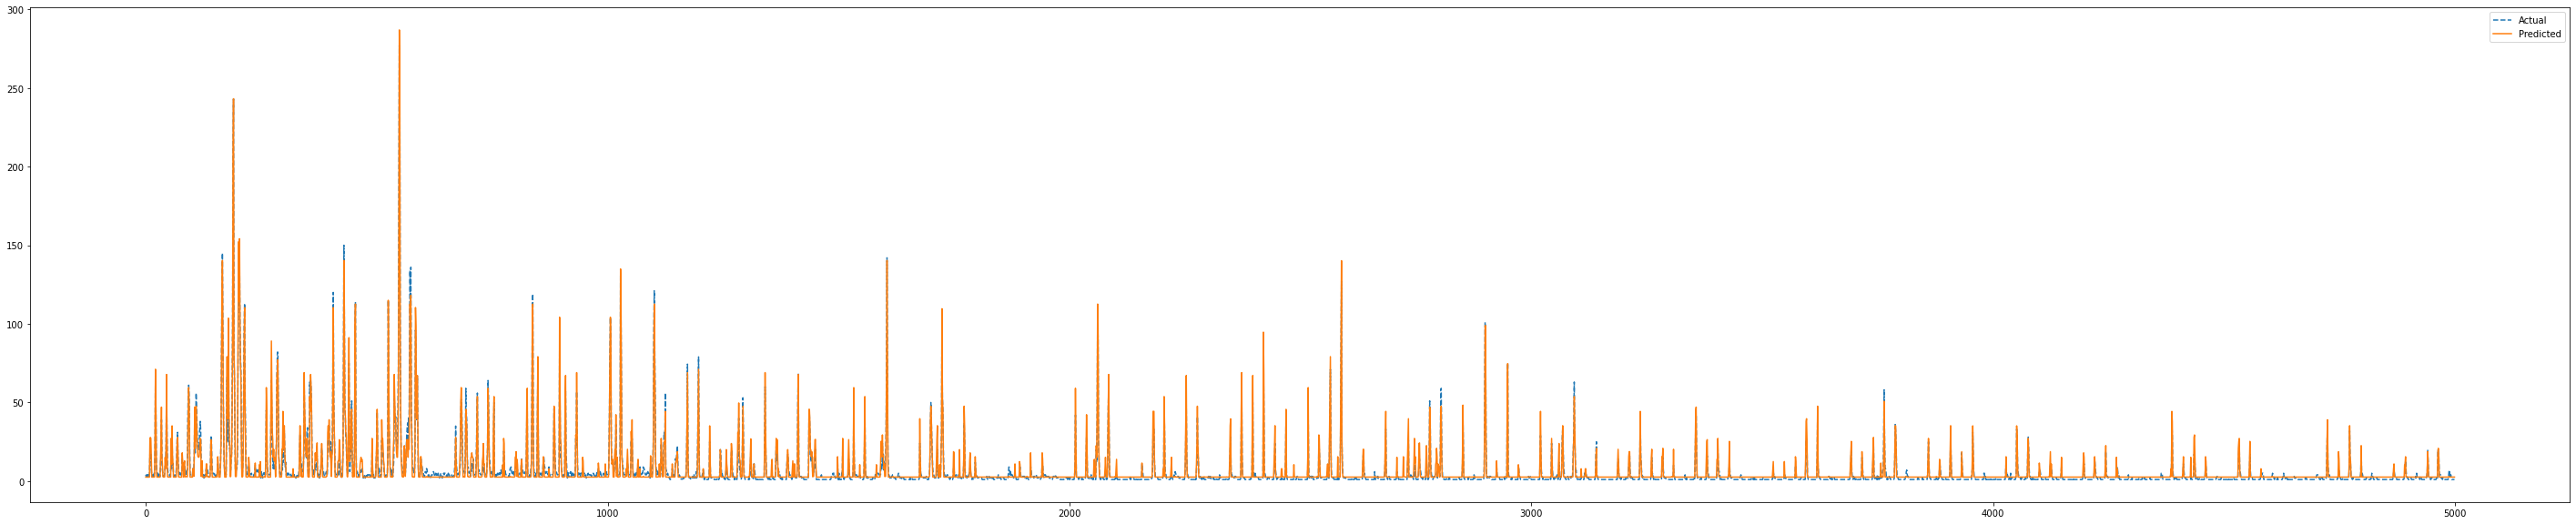

In [5]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

In [6]:
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
    param_distributions = param_dist,
    cv=3,
    n_iter = 10,
    n_jobs=-1)
    pre_gs_inst.fit(x_train, y_train) 
    y_pred = pre_gs_inst.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = pre_gs_inst.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NOX (µg/m³N) 
 R-squared: 0.9718062681874111 
 RMSE:  6.7842332500216616


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NO (µg/m³N) 
 R-squared: 0.9658592796760893 
 RMSE:  3.3069255613292854


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NO2 (µg/m³N) 
 R-squared: 0.9466824837706003 
 RMSE:  4.028974296271518


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SO2 (µg/m³N) 
 R-squared: 0.30994185730400736 
 RMSE:  1.503130013103742


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


O3 (µg/m³N) 
 R-squared: 0.8517512454281669 
 RMSE:  16.303942854394936


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


PM10 (µg/m³N) 
 R-squared: -0.02037718683595413 
 RMSE:  16.327067226430106


# Time Series

# alcantarilla

In [2]:
alc = pd.read_csv('alc.csv')
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2','SO2_roll_mean','SO2_lag1','SO2_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
    param_distributions = param_dist,
    cv=3,
    n_iter = 10,
    n_jobs=-1)
    pre_gs_inst.fit(x_train, y_train) 
    y_pred = pre_gs_inst.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = pre_gs_inst.score(x_test,y_test)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NOX (µg/m³N) 
 R-squared: 0.7192340385132643 
 RMSE:  19.50070391583838


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NO (µg/m³N) 
 R-squared: 0.6915682470670879 
 RMSE:  8.669750641273373


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


NO2 (µg/m³N) 
 R-squared: 0.7654787688498297 
 RMSE:  8.188980299681182


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SO2 (µg/m³N) 
 R-squared: 0.6267870004380272 
 RMSE:  0.8347595145101454


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


O3 (µg/m³N) 
 R-squared: 0.8921430047013877 
 RMSE:  11.003614453827666


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


PM10 (µg/m³N) 
 R-squared: 0.5876334557169154 
 RMSE:  8.263385074312929
